In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path=Path('/kaggle/input/intel-image-classification')

In [3]:
np.random.seed(42)
tfms=get_transforms()
data=ImageDataBunch.from_folder(path,train='seg_train',valid='seg_test',size=64,num_workers=4,ds_tfms=tfms).normalize(imagenet_stats)

In [4]:
print(len(data.valid_ds))
print(data.classes)
print(data.c)
print(len(data.train_ds))

3000
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6
14034


In [5]:
learn=cnn_learner(data,models.densenet161,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


In [6]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.688425,0.436672,0.144000,01:22
1,0.427832,0.340779,0.119333,01:11
2,0.353453,0.269022,0.097667,01:11
3,0.284307,0.244815,0.089000,01:10
4,0.238468,0.239432,0.093333,01:11


In [7]:
learn.unfreeze()

In [8]:
learn.model_dir = "/kaggle/working" 

In [9]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 9.12E-08


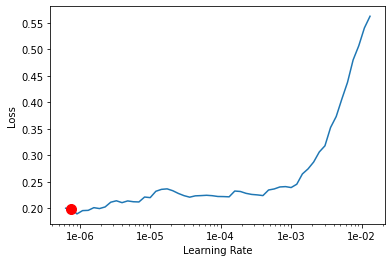

In [11]:
learn.recorder.plot(suggestion=True)

In [12]:
learn.fit_one_cycle(4,max_lr=slice(7.59e-8,7.59e-7))

epoch,train_loss,valid_loss,error_rate,time
0,0.228196,0.237786,0.091000,01:17
1,0.231208,0.238194,0.089667,01:18
2,0.215464,0.240067,0.089667,01:17
3,0.219656,0.239142,0.089000,01:16


In [13]:
learn.save('model-1')

In [14]:
interp=ClassificationInterpretation.from_learner(learn)

In [15]:
interp.top_losses()

torch.return_types.topk(
values=tensor([8.9187, 6.5244, 6.1083,  ..., -0.0000, -0.0000, -0.0000]),
indices=tensor([2158, 1549, 2059,  ...,  642,  526,  881]))

In [16]:
interp.most_confused(min_val=5)

[('glacier', 'mountain', 63),
 ('mountain', 'glacier', 42),
 ('buildings', 'street', 29),
 ('street', 'buildings', 28),
 ('glacier', 'sea', 23),
 ('mountain', 'sea', 22),
 ('sea', 'mountain', 15),
 ('sea', 'glacier', 9),
 ('buildings', 'sea', 5)]

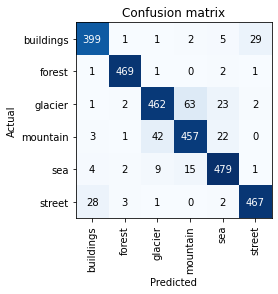

In [17]:
interp.plot_confusion_matrix()

In [18]:
learn.export(file = Path("/kaggle/working/export.pkl"))

In [19]:
imgs=['10017.jpg','10040.jpg','10059.jpg','10066.jpg','10052.jpg','10012.jpg','10043.jpg','10060.jpg','10038.jpg','10021.jpg','1003.jpg','10045.jpg','10004.jpg','10013.jpg','10069.jpg','10047.jpg','10034.jpg','10054.jpg','10048.jpg','10005.jpg']

mountain
street
forest
mountain
buildings
street
sea
forest
sea
forest
sea
street
street
mountain
sea
mountain
glacier
glacier
buildings
mountain


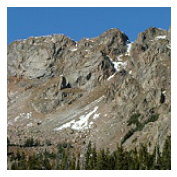

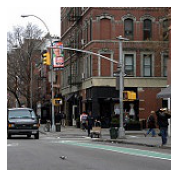

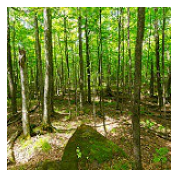

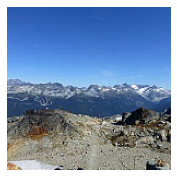

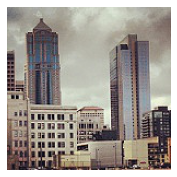

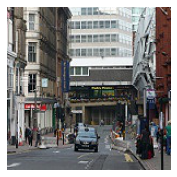

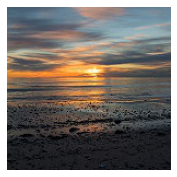

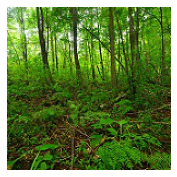

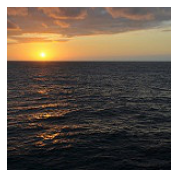

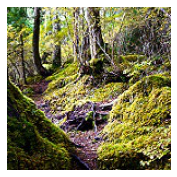

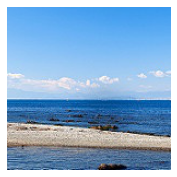

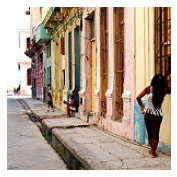

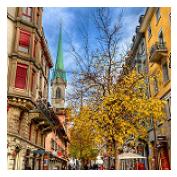

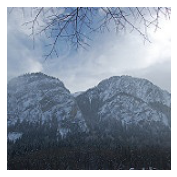

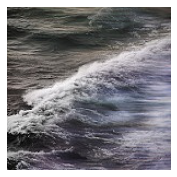

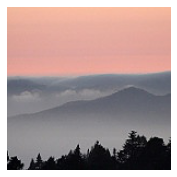

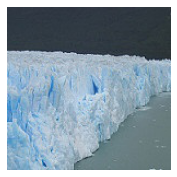

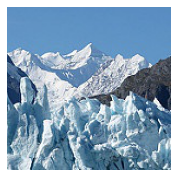

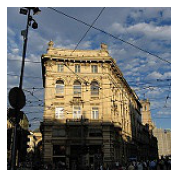

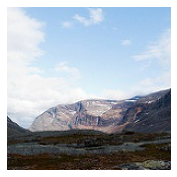

In [22]:
ls=[]
for i in range(len(imgs)):
    pathimg=path/'seg_pred/seg_pred/{}'.format(imgs[i])
    image=open_image(pathimg)
    pred_class,pred_idx,outputs = learn.predict(image)
    print(pred_class)
    image.show()
    

sea


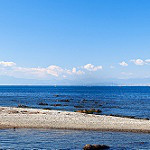

In [24]:
pathimg=path/'seg_pred/seg_pred/{}'.format(imgs[11])
image=open_image(pathimg)

pred_class,pred_idx,outputs = learn.predict(image)
print(pred_class)
image